In [1]:
import os
import pandas as pd

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf



from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras

In [2]:
# project specific
from utils import data_handler
from utils.models import vanilla_autoencoder

In [6]:
#x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 5, retain_phases="2", return_filenames= True)
x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 0, retain_phases="2", return_filenames= True)

retained phase 2
loading samples...
loaded 5740 samples
number of genes selected :  48741


In [7]:
latent_dim = 64
t_shape = (48741)


autoencoder = vanilla_autoencoder.generate_model(t_shape, latent_dim)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [8]:
hist = autoencoder.fit(x_train, epochs=100, shuffle=False)

Epoch 1/100
45/45 [==============================] - 3s 52ms/step - loss: 164858.8273
Epoch 2/100
45/45 [==============================] - 2s 48ms/step - loss: 29734.7189
Epoch 3/100
45/45 [==============================] - 2s 46ms/step - loss: 11952.3832
Epoch 4/100
45/45 [==============================] - 2s 42ms/step - loss: 10421.1710
Epoch 5/100
45/45 [==============================] - 2s 40ms/step - loss: 8431.4145
Epoch 6/100
45/45 [==============================] - 2s 45ms/step - loss: 6848.3723
Epoch 7/100
45/45 [==============================] - 2s 40ms/step - loss: 6504.4117
Epoch 8/100
45/45 [==============================] - 2s 45ms/step - loss: 6258.9419
Epoch 9/100
45/45 [==============================] - 3s 60ms/step - loss: 6006.1554
Epoch 10/100
45/45 [==============================] - 2s 46ms/step - loss: 5702.9387
Epoch 11/100
45/45 [==============================] - 2s 54ms/step - loss: 5318.8146
Epoch 12/100
45/45 [==============================] - 3s 56ms/step - 

[124953.1328125, 21670.703125, 11882.5908203125, 10187.7939453125, 7877.626953125, 6564.8349609375, 6255.28369140625, 5999.681640625, 5742.515625, 5433.63330078125, 5046.6533203125, 4534.73095703125, 3946.957763671875, 3567.827880859375, 3380.332763671875, 3235.932861328125, 3121.19677734375, 3007.8125, 2899.8876953125, 2805.24853515625, 2708.806640625, 2624.47216796875, 2552.272705078125, 2488.57568359375, 2439.875, 2394.90673828125, 2357.374267578125, 2324.574462890625, 2298.801513671875, 2271.517333984375, 2240.330810546875, 2220.45166015625, 2195.03076171875, 2171.548583984375, 2148.62744140625, 2132.66259765625, 2128.97119140625, 2131.532470703125, 2130.292724609375, 2067.28076171875, 2048.1611328125, 2028.0469970703125, 2012.2108154296875, 1991.9853515625, 1972.362060546875, 1953.9759521484375, 1937.639892578125, 1923.8017578125, 1913.9569091796875, 1895.4794921875, 1874.028076171875, 1881.1510009765625, 1874.8614501953125, 1859.156982421875, 1865.61962890625, 1863.1571044921875,

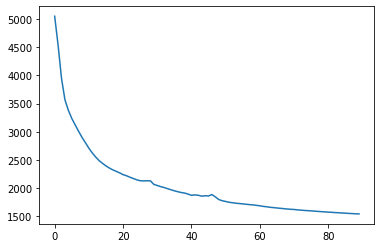

In [11]:
plt.plot(hist.history['loss'][10:])
print(hist.history['loss'])


In [12]:
autoencoder.encoder.save('../workfiles/simple_autoencoer_model')


INFO:tensorflow:Assets written to: ../workfiles/simple_autoencoer_model/assets


In [13]:
compressed_dataframe = autoencoder.encoder.predict(x_train)

45/45 [==============================] - 1s 15ms/step


In [14]:
df = pd.DataFrame(compressed_dataframe)
df["name"] = filenames

In [15]:
df.to_csv("../workfiles/compressed_data_simple_autoencoder_phase_2.csv")
